In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st

In [16]:
#expired_path = Path("../Resources/STD_expired_data_mercer_12_10_21_thru_12_10_23.csv")
#sold_data_path = Path("../Resources/STD_sold_data_mercer_12_10_22_thru_12_10_23.csv")
file_path = Path("C:/Users/chris/Desktop/Data_Projects/Absentee_Owner_Data_Cleaning/burl_camden_hunt_mercer_absentee_owners.csv")


In [17]:
pd.set_option('display.max_columns', None)

In [18]:
state_data = pd.read_csv(file_path)
state_data.head()

,Property Address Formatted,Tax ID,Owner Label Name,Current Owner Name,Owner Address,Owner City State,Owner Postal Code,Owner Postal 4,Owner Do Not Mail YN,City,State Or Province,Postal Code,Postal Code Plus 4,Prop Do Not Mail
0,13 Berkshire Ct,04-00092 06-00022 051-C.051,Frances Radichel,"RADICHEL, FRANCES",13 Berkshire Ct,Bordentown NJ,8505.0,0.0,No,Bordentown,NJ,8505,3107.0,No
1,17 Nor-Laine Dr,25-00002 01-00003 09,Jeffery S Cremer,CREMER Jeffery S,Po Box 446,COOKSTOWN NJ,8511.0,446.0,No,NaN,NJ,8511,1202.0,NaN
2,21-25 Hockamick Rd,25-00004 01-00005,Ernest P Atkinson,ATKINSON Ernest P,31 Hockamick Rd,COOKSTOWN NJ,8511.0,1010.0,No,Cookstown,NJ,8511,1010.0,NaN
3,10 Bunting Bridge Rd,25-00003-00005,Wanda A Davis,DAVIS Wanda A,9 Village Dr,LUMBERTON NJ,8048.0,4509.0,No,Cookstown,NJ,8511,1101.0,NaN
4,9 Bunting Bridge Rd,25-00004 02-00002,Jerry M Trembula,TREMBULA Jerry M,Po Box 451,COOKSTOWN NJ,8511.0,451.0,No,Cookstown,NJ,8511,1103.0,NaN


In [6]:
#merge expired data with sold data. 

#expired_sold_df = pd.merge(expired_data, sold_data, how="outer", on=['Address', 'Status', 'OriginalPrice', 'CurrentPrice', 'DOM', 'City', 'State', 'Zip Code'])

#expired_sold_df.head()

In [19]:
state_data.dropna(inplace=True)

In [20]:
addresses = state_data['Property Address Formatted'].count()
addresses

27190

In [21]:
#drop duplicates from Address column in expired_sold_df. 

#df_unique = df.drop_duplicates(subset=['address', 'city', 'state'])

state_data.drop_duplicates(subset=['Property Address Formatted', 'City', 'State Or Province'], keep=False, inplace=True,)

addresses = state_data['Property Address Formatted'].count()
addresses

26781

In [23]:
owner_addresses = state_data["Owner Address"].count()
owner_addresses

26781

In [36]:
#expired_properties = expired_sold_df[(expired_sold_df["Status"] == "Expired")]
#expired_properties


In [24]:
for col in state_data.columns:
    print(col)

Property Address Formatted
Tax ID
Owner Label Name
Current Owner Name
Owner Address
Owner City State
Owner Postal Code
Owner Postal 4
Owner Do Not Mail YN
City
State Or Province
Postal Code
Postal Code Plus 4
Prop Do Not Mail 


In [38]:
#reduced_expired_properties = expired_properties[['MLSNumber_x', 'Address', 'Status', 'OriginalPrice', 'CurrentPrice', 'DOM', 'StatusDate_x', 'City', 'State', 'Zip Code', 'ListOfficeName_x', 'ListAgentName_x', 'Bedrooms_x', 'Baths_x', 'Style_x']].copy()
#reduced_expired_properties

In [25]:
state_data.rename(columns = {'Property Address Formatted': 'Property Address', 'City': 'Property City', 'State Or Province': 'Property State', 'Postal Code': 'Property Zip Code', 
                                    'Owner Postal Code': 'Owner Zip Code', "Owner Postal 4": 'Owner Zip 4', 'Postal Code Plus 4': 'Property Zip 4'}, inplace = True)
state_data

,Property Address,Tax ID,Owner Label Name,Current Owner Name,Owner Address,Owner City State,Owner Zip Code,Owner Zip 4,Owner Do Not Mail YN,Property City,Property State,Property Zip Code,Property Zip 4,Prop Do Not Mail
0,13 Berkshire Ct,04-00092 06-00022 051-C.051,Frances Radichel,"RADICHEL, FRANCES",13 Berkshire Ct,Bordentown NJ,8505.0,0.0,No,Bordentown,NJ,8505,3107.0,No
263,323 Odonnell Ln,08-03505-00008 02,Philip J & Kathy J Mesmer,MESMER Philip J & Kathy J,323 Odonnells Ln,CINNAMINSON NJ,8077.0,4103.0,No,Riverton,NJ,8077,4103.0,No
264,15 Chest-Georgetown Rd,07-00900-00014 06,Joseph & Cynthia L Malison,MALISON Joseph & Cynthia L,323 N 9Th St,Surf City NJ,8008.0,5341.0,No,Chesterfield,NJ,8515,9647.0,No
265,488 Lakehurst Rd,29-00879 01-00035,David Diamond,DIAMOND David,Po Box 181,MEDFORD NJ,8055.0,181.0,No,Browns Mills,NJ,8015,6054.0,No
266,32 Parkers Mill Blvd,23-00041 12-00003,Deepaa Kulkarni,KULKARNI Deepaa,33 Davinci Dr,MONMOUTH JUNCTION NJ,8852.0,3503.0,No,Mount Holly,NJ,8060,1335.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31324,71 French St,08-00418-00006,Marlene Modzelewski & William Kimball Jr & Kim...,MODZELEWSKI Marlene & KIMBALL JR William & KIM...,72 Walnut Ave,Somerset Nj,8873.0,1425.0,Yes,Somerset,NJ,8873,2714.0,No
31325,135 Charles St,08-00417 01-00022 38,William F & Dannette Terhune,TERHUNE William F & Dannette,15 Woodlawn Rd,Somerset Nj,8873.0,1717.0,No,Somerset,NJ,8873,2774.0,Yes
31326,15 Gauguin Way,08-00417 01-00022 24,Jacqueline Fishbein,FISHBEIN Jacqueline,4 Top Of The World Way,Warren Nj,7059.0,7167.0,No,Somerset,NJ,8873,7721.0,No
31327,132 Charles St,08-00417 01-00022 08,Vincent & Linda A Naselli,NASELLI Vincent & Linda A,3201 Esperanza Cr-350,Austin Tx,78758.0,7858.0,No,Somerset,NJ,8873,7720.0,No


In [26]:
state_data.drop(["Tax ID", "Current Owner Name", "Owner Do Not Mail YN"], axis=1, inplace=True)
state_data

,Property Address,Owner Label Name,Owner Address,Owner City State,Owner Zip Code,Owner Zip 4,Property City,Property State,Property Zip Code,Property Zip 4,Prop Do Not Mail
0,13 Berkshire Ct,Frances Radichel,13 Berkshire Ct,Bordentown NJ,8505.0,0.0,Bordentown,NJ,8505,3107.0,No
263,323 Odonnell Ln,Philip J & Kathy J Mesmer,323 Odonnells Ln,CINNAMINSON NJ,8077.0,4103.0,Riverton,NJ,8077,4103.0,No
264,15 Chest-Georgetown Rd,Joseph & Cynthia L Malison,323 N 9Th St,Surf City NJ,8008.0,5341.0,Chesterfield,NJ,8515,9647.0,No
265,488 Lakehurst Rd,David Diamond,Po Box 181,MEDFORD NJ,8055.0,181.0,Browns Mills,NJ,8015,6054.0,No
266,32 Parkers Mill Blvd,Deepaa Kulkarni,33 Davinci Dr,MONMOUTH JUNCTION NJ,8852.0,3503.0,Mount Holly,NJ,8060,1335.0,No
...,...,...,...,...,...,...,...,...,...,...,...
31324,71 French St,Marlene Modzelewski & William Kimball Jr & Kim...,72 Walnut Ave,Somerset Nj,8873.0,1425.0,Somerset,NJ,8873,2714.0,No
31325,135 Charles St,William F & Dannette Terhune,15 Woodlawn Rd,Somerset Nj,8873.0,1717.0,Somerset,NJ,8873,2774.0,Yes
31326,15 Gauguin Way,Jacqueline Fishbein,4 Top Of The World Way,Warren Nj,7059.0,7167.0,Somerset,NJ,8873,7721.0,No
31327,132 Charles St,Vincent & Linda A Naselli,3201 Esperanza Cr-350,Austin Tx,78758.0,7858.0,Somerset,NJ,8873,7720.0,No


In [27]:
state_data['Owner Zip Code'] = state_data['Owner Zip Code'].astype(str).replace('\.0', '', regex=True)
state_data.head()

,Property Address,Owner Label Name,Owner Address,Owner City State,Owner Zip Code,Owner Zip 4,Property City,Property State,Property Zip Code,Property Zip 4,Prop Do Not Mail
0,13 Berkshire Ct,Frances Radichel,13 Berkshire Ct,Bordentown NJ,8505,0.0,Bordentown,NJ,8505,3107.0,No
263,323 Odonnell Ln,Philip J & Kathy J Mesmer,323 Odonnells Ln,CINNAMINSON NJ,8077,4103.0,Riverton,NJ,8077,4103.0,No
264,15 Chest-Georgetown Rd,Joseph & Cynthia L Malison,323 N 9Th St,Surf City NJ,8008,5341.0,Chesterfield,NJ,8515,9647.0,No
265,488 Lakehurst Rd,David Diamond,Po Box 181,MEDFORD NJ,8055,181.0,Browns Mills,NJ,8015,6054.0,No
266,32 Parkers Mill Blvd,Deepaa Kulkarni,33 Davinci Dr,MONMOUTH JUNCTION NJ,8852,3503.0,Mount Holly,NJ,8060,1335.0,No


In [28]:
#correct zip code by adding the leading 0
state_data['Owner Zip Code'] = state_data['Owner Zip Code'].apply(lambda x: '{0:0>5}'.format(x))
state_data['Property Zip Code'] = state_data['Property Zip Code'].apply(lambda x: '{0:0>5}'.format(x))
state_data.head()

,Property Address,Owner Label Name,Owner Address,Owner City State,Owner Zip Code,Owner Zip 4,Property City,Property State,Property Zip Code,Property Zip 4,Prop Do Not Mail
0,13 Berkshire Ct,Frances Radichel,13 Berkshire Ct,Bordentown NJ,08505,0.0,Bordentown,NJ,08505,3107.0,No
263,323 Odonnell Ln,Philip J & Kathy J Mesmer,323 Odonnells Ln,CINNAMINSON NJ,08077,4103.0,Riverton,NJ,08077,4103.0,No
264,15 Chest-Georgetown Rd,Joseph & Cynthia L Malison,323 N 9Th St,Surf City NJ,08008,5341.0,Chesterfield,NJ,08515,9647.0,No
265,488 Lakehurst Rd,David Diamond,Po Box 181,MEDFORD NJ,08055,181.0,Browns Mills,NJ,08015,6054.0,No
266,32 Parkers Mill Blvd,Deepaa Kulkarni,33 Davinci Dr,MONMOUTH JUNCTION NJ,08852,3503.0,Mount Holly,NJ,08060,1335.0,No


In [29]:
a = state_data['Property City'].unique()
a

array(['Bordentown', 'Riverton', 'Chesterfield', 'Browns Mills',
       'Mount Holly', 'Moorestown', 'Medford', 'Pemberton', 'Roebling',
       'Cinnaminson', 'Burlington', 'Medford Lakes', 'Beverly',
       'Columbus', 'Marlton', 'Crosswicks', 'Riverside', 'Delran',
       'Mount Laurel', 'Maple Shade', 'Wrightstown', 'Hainesport',
       'Delanco', 'Trenton', 'Palmyra', 'Shamong', 'Tuckerton',
       'Lumberton', 'Florence', 'Edgewater Park', 'Egg Harbor City',
       'Little Egg Harbor Twp', 'Willingboro', 'Vincentown',
       'Southampton', 'Chatsworth', 'Tabernacle', 'Westampton',
       'Rancocas', 'Jobstown', 'Camden', 'West Berlin', 'Audubon',
       'Merchantville', 'Berlin', 'Barrington', 'Pennsauken', 'Brooklawn',
       'Gloucester City', 'Berlin Boro', 'Bellmawr', 'Haddonfield',
       'Lawnside', 'Haddon Heights', 'Pine Hill', 'Voorhees', 'Atco',
       'Somerdale', 'Hammonton', 'Runnemede', 'Sicklerville', 'Stratford',
       'Oaklyn', 'Blue Anchor', 'Waterford Works', '

In [30]:
#reorder columns to a more logical order:
state_data = state_data[["Property Address", "Property City", "Property State", "Property Zip Code", "Property Zip 4", 
             "Owner Label Name", "Owner Address", "Owner City State", "Owner Zip Code", "Owner Zip 4"]] 

In [31]:
state_data.sort_values(by=['Property City'], inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_18144\1695291985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data.sort_values(by=['Property City'], inplace=True)


In [34]:
state_data.to_csv('burl-camden-mercer-hunterdon-somerset_absentee_owners.csv', index=False)

In [14]:
#clean data by renaming city's to one name per city. 

reduced_expired_properties['City'].replace(['Cranbury', 'Ewing Twp', 'Hamilton Township', 'Lawrence Township', 'Lawrenceville', 'Lambertville'], ['East Windsor', 'Ewing', 'Hamilton', 'Lawrence', 'Lawrence', 'Hopewell'], inplace=True)


In [15]:
reduced_expired_properties.count()

MLS Number        295
Address           295
Status            295
List Price        295
Expired Price     295
DOM               295
Expired Date      295
City              295
State             295
Zip Code          295
Listing Office    283
Listing Agent     295
Bedrooms          295
Bathrooms         295
House Style       295
dtype: int64

In [16]:
#number of expired listings per city in Mercer County, NJ from 12/10/2021 to 12/10/2023
count_per_city = reduced_expired_properties.groupby('City')['Status'].count().sort_values(ascending=False)
count_per_city

City
Trenton               113
Hamilton               40
Princeton              39
Ewing                  23
Lawrence               19
Pennington             14
East Windsor           12
Robbinsville           12
Hightstown             11
Hopewell                5
Princeton Junction      4
Titusville              2
West Windsor            1
Name: Status, dtype: int64

In [17]:
sorted_expired_list = reduced_expired_properties.sort_values(by=['City'], ascending=True)
sorted_expired_list

,MLS Number,Address,Status,List Price,Expired Price,DOM,Expired Date,City,State,Zip Code,Listing Office,Listing Agent,Bedrooms,Bathrooms,House Style
260,NJME2030282,894 Jamestown Rd,Expired,"$319,900","$325,000",69,11/15/2023,East Windsor,NJ,08520,Keller Williams Premier,Donna Moskowitz,2.0,2.0,Other
390,NJME2025036,15 Bristol,Expired,"$640,000","$640,000",30,01/31/2024,East Windsor,NJ,08520,"Compass New Jersey, LLC - Short Hills",Leonora E Caminiti,4.0,3.0,Colonial
50,NJME2036626,131l The Orch #131L,Expired,"$185,000","$175,000",66,12/31/2023,East Windsor,NJ,08512,New Jersey Realty LLC,Vibha Patel,2.0,1.0,Other
376,NJME2026090,K-24 Avon Dr,Expired,"$185,000","$185,000",9,07/31/2023,East Windsor,NJ,08520,Keller Williams Real Estate - Princeton,Lan Ou,2.0,2.0,AFrame
60,NJME2036388,26 Columbia Ave,Expired,"$800,000","$800,000",93,04/18/2024,East Windsor,NJ,08520,Wellington Realty Group Inc.,Rajeshkumar Patel,4.0,4.0,Contemporary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,NJME2029560,223 Elmer St,Expired,"$165,000","$165,000",44,08/01/2023,Trenton,NJ,08611,Weichert Realtors-Princeton Junction,Joseph D Baylis,2.0,1.0,Other
233,NJME2031562,15 Conover Ave,Expired,"$279,900","$279,900",21,12/19/2023,Trenton,NJ,08638,"EXP Realty, LLC",Debra Cohen,3.0,1.0,Rancher
253,NJME2030924,62 S Walter Ave,Expired,"$165,000","$165,000",140,11/16/2023,Trenton,NJ,08609,HomeSmart First Advantage Realty,Rachel Mermelstein,3.0,1.0,Colonial
213,NJME2032132,25 Meade St,Expired,"$90,000","$90,000",1,12/11/2023,Trenton,NJ,08638,"EXP Realty, LLC",Shonda N McCallum,3.0,1.0,Other


In [18]:
sorted_expired_list = sorted_expired_list.drop(['Listing Office', 'Listing Agent'], axis=1)
sorted_expired_list

,MLS Number,Address,Status,List Price,Expired Price,DOM,Expired Date,City,State,Zip Code,Bedrooms,Bathrooms,House Style
260,NJME2030282,894 Jamestown Rd,Expired,"$319,900","$325,000",69,11/15/2023,East Windsor,NJ,08520,2.0,2.0,Other
390,NJME2025036,15 Bristol,Expired,"$640,000","$640,000",30,01/31/2024,East Windsor,NJ,08520,4.0,3.0,Colonial
50,NJME2036626,131l The Orch #131L,Expired,"$185,000","$175,000",66,12/31/2023,East Windsor,NJ,08512,2.0,1.0,Other
376,NJME2026090,K-24 Avon Dr,Expired,"$185,000","$185,000",9,07/31/2023,East Windsor,NJ,08520,2.0,2.0,AFrame
60,NJME2036388,26 Columbia Ave,Expired,"$800,000","$800,000",93,04/18/2024,East Windsor,NJ,08520,4.0,4.0,Contemporary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,NJME2029560,223 Elmer St,Expired,"$165,000","$165,000",44,08/01/2023,Trenton,NJ,08611,2.0,1.0,Other
233,NJME2031562,15 Conover Ave,Expired,"$279,900","$279,900",21,12/19/2023,Trenton,NJ,08638,3.0,1.0,Rancher
253,NJME2030924,62 S Walter Ave,Expired,"$165,000","$165,000",140,11/16/2023,Trenton,NJ,08609,3.0,1.0,Colonial
213,NJME2032132,25 Meade St,Expired,"$90,000","$90,000",1,12/11/2023,Trenton,NJ,08638,3.0,1.0,Other


In [19]:
# Reset index without assigning to column
sorted_expired_list.reset_index(inplace=True, drop=True)

sorted_expired_list

,MLS Number,Address,Status,List Price,Expired Price,DOM,Expired Date,City,State,Zip Code,Bedrooms,Bathrooms,House Style
0,NJME2030282,894 Jamestown Rd,Expired,"$319,900","$325,000",69,11/15/2023,East Windsor,NJ,08520,2.0,2.0,Other
1,NJME2025036,15 Bristol,Expired,"$640,000","$640,000",30,01/31/2024,East Windsor,NJ,08520,4.0,3.0,Colonial
2,NJME2036626,131l The Orch #131L,Expired,"$185,000","$175,000",66,12/31/2023,East Windsor,NJ,08512,2.0,1.0,Other
3,NJME2026090,K-24 Avon Dr,Expired,"$185,000","$185,000",9,07/31/2023,East Windsor,NJ,08520,2.0,2.0,AFrame
4,NJME2036388,26 Columbia Ave,Expired,"$800,000","$800,000",93,04/18/2024,East Windsor,NJ,08520,4.0,4.0,Contemporary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,NJME2029560,223 Elmer St,Expired,"$165,000","$165,000",44,08/01/2023,Trenton,NJ,08611,2.0,1.0,Other
291,NJME2031562,15 Conover Ave,Expired,"$279,900","$279,900",21,12/19/2023,Trenton,NJ,08638,3.0,1.0,Rancher
292,NJME2030924,62 S Walter Ave,Expired,"$165,000","$165,000",140,11/16/2023,Trenton,NJ,08609,3.0,1.0,Colonial
293,NJME2032132,25 Meade St,Expired,"$90,000","$90,000",1,12/11/2023,Trenton,NJ,08638,3.0,1.0,Other


In [20]:
sorted_expired_list.to_csv('expired_properties_mercer_4-26-23_thru_4-26-24.csv')

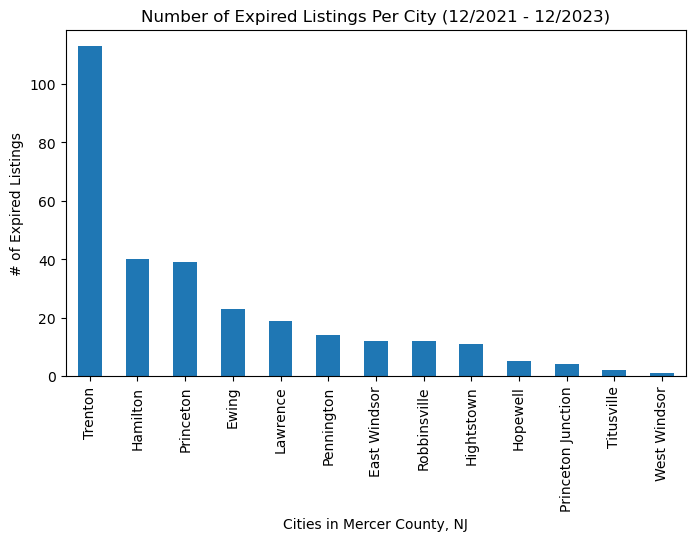

<Figure size 640x480 with 0 Axes>

In [21]:
#Bar Graph showing number of expired listings per city in Mercer County, NJ from 12/10/2021 to 12/10/2023

count_per_city.plot(kind="bar", figsize=(8,4.5))
plt.ylabel("# of Expired Listings")
plt.xlabel("Cities in Mercer County, NJ")
plt.title("Number of Expired Listings Per City (12/2021 - 12/2023)")
plt.show()
plt.tight_layout()

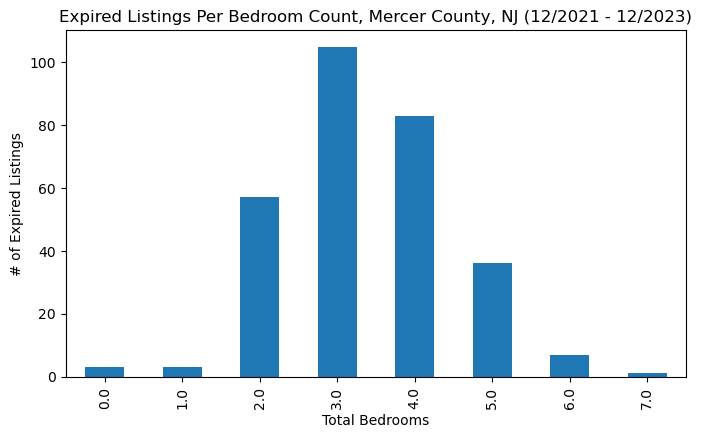

<Figure size 640x480 with 0 Axes>

In [22]:
#number of expired listings based on number of bedrooms
count_per_house_bedroom = reduced_expired_properties.groupby('Bedrooms')['Status'].count()
count_per_house_bedroom

count_per_house_bedroom.plot(kind="bar", figsize=(8,4.5))
plt.ylabel("# of Expired Listings")
plt.xlabel("Total Bedrooms")
plt.title("Expired Listings Per Bedroom Count, Mercer County, NJ (12/2021 - 12/2023)")
plt.show()
plt.tight_layout()

In [23]:
#average days on market until expiration per city
average_DOM = reduced_expired_properties.groupby('City')['DOM'].mean().sort_values(ascending=False)
average_DOM

City
Hopewell              165.600000
Princeton             131.205128
Pennington            119.357143
East Windsor           84.333333
Robbinsville           79.833333
Trenton                71.088496
Ewing                  64.086957
Hightstown             62.454545
Lawrence               48.315789
Titusville             43.000000
Hamilton               39.750000
Princeton Junction     33.750000
West Windsor           23.000000
Name: DOM, dtype: float64

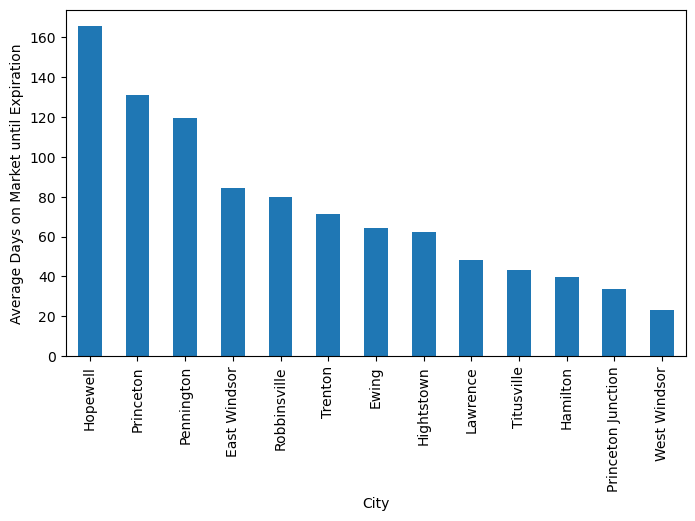

<Figure size 640x480 with 0 Axes>

In [24]:
#average days on market until expiration per city on bar graph

average_DOM.plot(kind="bar", figsize=(8,4.5))
plt.ylabel("Average Days on Market until Expiration")
plt.xlabel("City")
plt.show()
plt.tight_layout()

In [25]:
exp_date = reduced_expired_properties.groupby('Expired Date')['Status'].count().sort_values(ascending=False)
exp_date

Expired Date
12/31/2023    22
06/30/2023    10
01/31/2024     9
08/31/2023     9
10/31/2023     9
              ..
06/01/2023     1
05/29/2023     1
05/16/2023     1
05/13/2023     1
07/19/2023     1
Name: Status, Length: 151, dtype: int64

In [26]:
listing_office = reduced_expired_properties['Listing Office'].unique()
listing_office_count = len(listing_office)
listing_office_count

93

In [27]:
listing_agent = reduced_expired_properties['Listing Agent'].unique()
listing_agent_count = len(listing_agent)
listing_agent_count

207

In [28]:
tot_average_dom = reduced_expired_properties['DOM'].mean()
tot_average_dom

76.37966101694916

In [29]:
#convert list price data to integer for calculations:

reduced_expired_properties['List Price'] = reduced_expired_properties['List Price'].str.replace('$', '')
reduced_expired_properties['List Price'] = reduced_expired_properties['List Price'].str.replace(',', '')

reduced_expired_properties['List Price'] = reduced_expired_properties['List Price'].astype(str).astype(int)


In [30]:
#convert expired price to integer for calculations:

reduced_expired_properties['Expired Price'] = reduced_expired_properties['Expired Price'].str.replace('$', '')
reduced_expired_properties['Expired Price'] = reduced_expired_properties['Expired Price'].str.replace(',', '')

reduced_expired_properties['Expired Price'] = reduced_expired_properties['Expired Price'].astype(str).astype(int)

In [31]:
reduced_expired_properties.dtypes



MLS Number         object
Address            object
Status             object
List Price          int32
Expired Price       int32
DOM                 int64
Expired Date       object
City               object
State              object
Zip Code           object
Listing Office     object
Listing Agent      object
Bedrooms          float64
Bathrooms         float64
House Style        object
dtype: object

In [32]:
#find the average list price

avg_list = reduced_expired_properties["List Price"].mean()
avg_list

605725.9084745763

In [33]:
avg_expired = reduced_expired_properties["Expired Price"].mean()
avg_expired

590753.3762711864

In [34]:
avg_dom = reduced_expired_properties["DOM"].mean()
avg_dom

76.37966101694916

In [35]:
offices = reduced_expired_properties["Listing Office"].unique()
tot_offices = len(offices)
tot_offices

93

In [36]:
agents = reduced_expired_properties["Listing Agent"].unique()
tot_agents = len(agents)
tot_agents

207

In [37]:
av_bedrooms = reduced_expired_properties["Bedrooms"].mean()
av_bedrooms

3.3661016949152542

In [38]:
av_bathrooms = reduced_expired_properties["Bathrooms"].mean()
av_bathrooms

2.328813559322034

In [39]:
hstyle = reduced_expired_properties["House Style"].unique()
tot_housestyles = len(hstyle)
tot_housestyles

44

In [40]:
expireds = reduced_expired_properties["Status"]
tot_expireds = len(expireds)
tot_expireds

295

In [41]:
listing_office_expireds = reduced_expired_properties.groupby('Listing Agent')['Status'].count().sort_values(ascending=False)
listing_office_expireds

Listing Agent
Stefanie R Prettyman    7
Sharif Hatab            6
Kathleen Proctor        6
Iris Nitzan             5
Arkadiy Isakov          5
                       ..
Jerome Beckworth        1
Joan Loraine Otis       1
Joe DeLorenzo           1
Joel Yesenosky Jr.      1
laila tabash            1
Name: Status, Length: 207, dtype: int64

In [42]:
exp_data_sum = {"Total Expired Listings": tot_expireds, '# of Unique Offices': listing_office_count, '# of Listing Agents': listing_agent_count, 'Average DOM': avg_dom, 
                'Average List Price': avg_list, 'Average Expired Price': avg_expired, 'Average # of Bedrooms': av_bedrooms, 'Average # of Bathrooms': av_bathrooms, '# of Home Styles': tot_housestyles}
index = [0]
expired_summary = pd.DataFrame(exp_data_sum, index=index)
expired_summary

,Total Expired Listings,# of Unique Offices,# of Listing Agents,Average DOM,Average List Price,Average Expired Price,Average # of Bedrooms,Average # of Bathrooms,# of Home Styles
0,295,93,207,76.379661,605725.908475,590753.376271,3.366102,2.328814,44


In [ ]:
# #Part 1. ---> correlation coefficient calculation:

# print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(expired_summary['Average List Price'], expired_summary['Average Expired Price'])[0],2)}")

# #Part 2. ---> linear regression model

# from scipy.stats import linregress


# (slope, intercept, rvalue, pvalue, stderr) = linregress(expired_summary['Average List Price'], expired_summary['Average Expired Price'])
# regress_values = (expired_summary['Average List Price']) * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(expired_summary['Average List Price'], expired_summary['Average Expired Price'], [round(st.pearsonr(expired_summary['Average List Price'], expired_summary['Average Expired Price'])[0],2)],
#                          alpha=1, edgecolors='b', linewidths=7)
# plt.plot(expired_summary['Average List Price'],regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel("Weight (g)")
# plt.ylabel("Average Tumor Volume (mm3)")
# plt.title("For Entire Capomulin Regimen")
# plt.show()

### Skip Tracing Section Starts Here

In [69]:
# Imports
import requests
import json

#api key
#from api_keys import skip_trace_rapidapi_key


In [70]:
#convert sorted_expired_list to json format

json_str_exp = sorted_expired_list.to_json(orient='records')

json_str_exp

'[{"MLS Number":"NJME2030282","Address":"894 Jamestown Rd","Status":"Expired","List Price":"$319,900","Expired Price":"$325,000","DOM":69,"Expired Date":"11\\/15\\/2023","City":"East Windsor","State":"NJ","Zip Code":"08520","Bedrooms":2.0,"Bathrooms":2.0,"House Style":"Other"},{"MLS Number":"NJME2025036","Address":"15 Bristol","Status":"Expired","List Price":"$640,000","Expired Price":"$640,000","DOM":30,"Expired Date":"01\\/31\\/2024","City":"East Windsor","State":"NJ","Zip Code":"08520","Bedrooms":4.0,"Bathrooms":3.0,"House Style":"Colonial"},{"MLS Number":"NJME2036626","Address":"131l The Orch #131L","Status":"Expired","List Price":"$185,000","Expired Price":"$175,000","DOM":66,"Expired Date":"12\\/31\\/2023","City":"East Windsor","State":"NJ","Zip Code":"08512","Bedrooms":2.0,"Bathrooms":1.0,"House Style":"Other"},{"MLS Number":"NJME2026090","Address":"K-24 Avon Dr","Status":"Expired","List Price":"$185,000","Expired Price":"$185,000","DOM":9,"Expired Date":"07\\/31\\/2023","City":

In [71]:
#clean up the output of the JSON file

json_exp_list = json.loads(json_str_exp)
print(json.dumps(json_exp_list, indent=4))

[
    {
        "MLS Number": "NJME2030282",
        "Address": "894 Jamestown Rd",
        "Status": "Expired",
        "List Price": "$319,900",
        "Expired Price": "$325,000",
        "DOM": 69,
        "Expired Date": "11/15/2023",
        "City": "East Windsor",
        "State": "NJ",
        "Zip Code": "08520",
        "Bedrooms": 2.0,
        "Bathrooms": 2.0,
        "House Style": "Other"
    },
    {
        "MLS Number": "NJME2025036",
        "Address": "15 Bristol",
        "Status": "Expired",
        "List Price": "$640,000",
        "Expired Price": "$640,000",
        "DOM": 30,
        "Expired Date": "01/31/2024",
        "City": "East Windsor",
        "State": "NJ",
        "Zip Code": "08520",
        "Bedrooms": 4.0,
        "Bathrooms": 3.0,
        "House Style": "Colonial"
    },
    {
        "MLS Number": "NJME2036626",
        "Address": "131l The Orch #131L",
        "Status": "Expired",
        "List Price": "$185,000",
        "Expired Price": "$17

In [72]:
#Save cleaned output of JSON file to list for API:

#parsed_exp = json.loads(json_exp)
exp_prop_json = json.dumps(json_exp_list, indent=4)


with open("exp_list.json", "w") as outfile:
    outfile.write(exp_prop_json)

In [80]:
# Read the JSON file
with open('C:/Users/chris/Desktop/Data_Projects/real_estate_data_processing/Expired Py/exp_list.json') as f:
    data = json.load(f)

In [81]:
#USE API to skip trace and INCLUDE ADDRESS IN JSON OUTPUT:

import requests
import json

# Define the API endpoint
url = "https://skip-trace1.p.rapidapi.com/byAddress"

# Define headers for the API request
headers = {
    "X-RapidAPI-Key": "b4e5d54a75msh18dac2cb4c23c66p19b0afjsn1a921448d241",
    "X-RapidAPI-Host": "skip-trace1.p.rapidapi.com"
}

# Iterate through the data in the JSON file
for item in data:
    # Extract streetAddress, city, and state from each item
    street_address = item["Address"]
    city = item["City"]
    state = item["State"]

    # Define the query parameters
    querystring = {"streetAddress": street_address, "city": city, "state": state}

    # Make the API request
    response = requests.get(url, headers=headers, params=querystring)

    # If the API request was successful, add the response to the item
    if response.status_code == 200:
        item["APIResponse"] = response.json()
        # item["APIResponse"]["Address"] = street_address
        # item["APIResponse"]["City"] = city
        # item["APIResponse"]["State"] = state
        
    else:
        print(f"Failed to fetch data for {street_address}, {city}, {state}. Status code: {response.status_code}")
        
# Save the updated data to a JSON file
with open('output.json', 'w') as f:
    json.dump(data, f, indent=4)

In [82]:
#show data retreived from skip tracing api:

print(data)

[{'MLS Number': 'NJME2030282', 'Address': '894 Jamestown Rd', 'Status': 'Expired', 'List Price': '$319,900', 'Expired Price': '$325,000', 'DOM': 69, 'Expired Date': '11/15/2023', 'City': 'East Windsor', 'State': 'NJ', 'Zip Code': '08520', 'Bedrooms': 2.0, 'Bathrooms': 2.0, 'House Style': 'Other', 'APIResponse': {'status': 200, 'error': False, 'details': '', 'data': [{'name': 'David Meiswinkle', 'telephones': ['(908) 420-2943', '(609) 336-7307', '(609) 336-7721', '(908) 359-7773', '(908) 359-1985', '(908) 763-1103', '(609) 448-7851', '(732) 846-1122', '(908) 545-0505', '(908) 846-1122'], 'emails': ['david.meiswinkle@yahoo.com', 'dmeiswinkle@aol.com', 'dmeiswinkle@yahoo.com', 'regil4@aol.com']}, {'name': 'Kristian D Meiswinkle', 'telephones': ['(908) 420-0545', '(908) 359-1985', '(908) 420-2946', '(609) 336-7721', '(609) 336-7307', '(908) 431-5269', '(908) 420-2943'], 'emails': ['kristian3@aol.com', 'kristianmeiswinkle@aol.com', 'krismeis@eden.rutgers.edu']}, {'name': 'Tara A Meiswinkle'

In [83]:
#check data type of json file:
print(type(data))

<class 'list'>


In [84]:
#normalize json data:

json_nor = pd.json_normalize(data, max_level=1)

In [85]:
#change display options so we can read the whole output:

pd.set_option('display.max_colwidth', None)

In [86]:
#Combine skip tracing data with original dataframe:

# Assuming df is your original DataFrame
df = json_nor.explode('APIResponse.data').reset_index(drop=True)

# Normalize the 'APIResponse.data' column into a DataFrame
data_df = pd.json_normalize(df['APIResponse.data'])

# Drop the 'APIResponse.data' column from the original DataFrame
df = df.drop('APIResponse.data', axis=1)

# Concatenate the original DataFrame and the normalized DataFrame along the columns axis
df = pd.concat([df, data_df], axis=1)

In [87]:
#preview dataframe:

df.head()

,MLS Number,Address,Status,List Price,Expired Price,DOM,Expired Date,City,State,Zip Code,Bedrooms,Bathrooms,House Style,APIResponse.status,APIResponse.error,APIResponse.details,name,telephones,emails
0,NJME2030282,894 Jamestown Rd,Expired,"$319,900","$325,000",69,11/15/2023,East Windsor,NJ,08520,2.0,2.0,Other,200,False,,David Meiswinkle,"[(908) 420-2943, (609) 336-7307, (609) 336-7721, (908) 359-7773, (908) 359-1985, (908) 763-1103, (609) 448-7851, (732) 846-1122, (908) 545-0505, (908) 846-1122]","[david.meiswinkle@yahoo.com, dmeiswinkle@aol.com, dmeiswinkle@yahoo.com, regil4@aol.com]"
1,NJME2030282,894 Jamestown Rd,Expired,"$319,900","$325,000",69,11/15/2023,East Windsor,NJ,08520,2.0,2.0,Other,200,False,,Kristian D Meiswinkle,"[(908) 420-0545, (908) 359-1985, (908) 420-2946, (609) 336-7721, (609) 336-7307, (908) 431-5269, (908) 420-2943]","[kristian3@aol.com, kristianmeiswinkle@aol.com, krismeis@eden.rutgers.edu]"
2,NJME2030282,894 Jamestown Rd,Expired,"$319,900","$325,000",69,11/15/2023,East Windsor,NJ,08520,2.0,2.0,Other,200,False,,Tara A Meiswinkle,"[(732) 355-0594, (732) 514-0561]",[]
3,NJME2030282,894 Jamestown Rd,Expired,"$319,900","$325,000",69,11/15/2023,East Windsor,NJ,08520,2.0,2.0,Other,200,False,,Heidi Geardino,[(732) 297-8809],"[kirs6@hotmail.com, kirs6@aol.com, irs6@aol.com, heidigeardino@hotmail.com, hgeardino@prodigy.net, irs6@angelfire.com, irs6@compuserve.com]"
4,NJME2030282,894 Jamestown Rd,Expired,"$319,900","$325,000",69,11/15/2023,East Windsor,NJ,08520,2.0,2.0,Other,200,False,,Tara A Meiswinkle,"[(908) 420-2944, (609) 336-7721, (609) 336-7307, (908) 359-7773, (502) 716-4273, (732) 514-0561, (732) 355-0594, (719) 778-7576, (732) 747-9265, (917) 299-0333, (908) 922-1783]","[tmeiswinkle@hotmail.com, tarameiswinkle@msn.com, tmeiswinkle@gmail.com, atmeisz42winkle@hotmail.com]"


In [88]:
#save combined data to csv:

df.to_csv('skip_trace_uncleaned.csv')

### Testing Section for API is Below:

In [20]:
#TESTING

# initialize list of lists
test = [["3 Manor Dr", "Ewing", "NJ", "4", "2"], ["2 Manor Dr", "Ewing", "NJ", "3", "2"], ["5500 Grand Lake Dr", "San Antonio", "TX", "2", "2"]]
 
# Create the pandas DataFrame
test_df = pd.DataFrame(test, columns=['Address', 'City', "State", "Bedrooms", "Bathrooms"])
 
# print dataframe.
print(test_df)

              Address         City State Bedrooms Bathrooms
0          3 Manor Dr        Ewing    NJ        4         2
1          2 Manor Dr        Ewing    NJ        3         2
2  5500 Grand Lake Dr  San Antonio    TX        2         2


In [21]:
#TESTING
json_str = test_df.to_json(orient='records')

json_str

'[{"Address":"3 Manor Dr","City":"Ewing","State":"NJ","Bedrooms":"4","Bathrooms":"2"},{"Address":"2 Manor Dr","City":"Ewing","State":"NJ","Bedrooms":"3","Bathrooms":"2"},{"Address":"5500 Grand Lake Dr","City":"San Antonio","State":"TX","Bedrooms":"2","Bathrooms":"2"}]'

In [22]:
#TESTING
import json
test_list = json.loads(json_str)
print(json.dumps(test_list, indent=4))

[
    {
        "Address": "3 Manor Dr",
        "City": "Ewing",
        "State": "NJ",
        "Bedrooms": "4",
        "Bathrooms": "2"
    },
    {
        "Address": "2 Manor Dr",
        "City": "Ewing",
        "State": "NJ",
        "Bedrooms": "3",
        "Bathrooms": "2"
    },
    {
        "Address": "5500 Grand Lake Dr",
        "City": "San Antonio",
        "State": "TX",
        "Bedrooms": "2",
        "Bathrooms": "2"
    }
]


In [23]:
#TESTING
exp_prop_json = json.dumps(test_list, indent=4)


with open("test.json", "w") as outfile:
    outfile.write(exp_prop_json)

In [24]:
#TESTING
# Read the JSON file
with open('C:/Users/chris/Desktop/Data_Projects/real_estate_data_processing/Expired Py/test.json') as f:
    test_data = json.load(f)

In [235]:
#TESTING
#WITHOUT ADDRESS IN JSON OUTPUT:

# # Define the API endpoint
# url = "https://skip-trace1.p.rapidapi.com/byAddress"

# # Define headers for the API request
# headers = {
#     "X-RapidAPI-Key": "b4e5d54a75msh18dac2cb4c23c66p19b0afjsn1a921448d241",
#     "X-RapidAPI-Host": "skip-trace1.p.rapidapi.com"
# }

# # Iterate through the data in the JSON file
# for item in data:
#     # Extract streetAddress, city, and state from each item
#     street_address = item["Address"]
#     city = item["City"]
#     state = item["State"]
    
#     # Define the query parameters
#     querystring = {"streetAddress": street_address, "city": city, "state": state}
    
#     # Make the API request
#     response = requests.get(url, headers=headers, params=querystring)
    
#     # Print the API response
# data = response.json()



In [78]:
#TESTING
#INCLUDING ADDRESS IN JSON OUTPUT:
#from api_keys import skip_trace_api_key
import requests
import json

# Define the API endpoint
url = "https://skip-trace1.p.rapidapi.com/byAddress"

# Define headers for the API request
headers = {
    "X-RapidAPI-Key": "b4e5d54a75msh18dac2cb4c23c66p19b0afjsn1a921448d241",
    "X-RapidAPI-Host": "skip-trace1.p.rapidapi.com"
}

# Iterate through the data in the JSON file
for item in test_data:
    # Extract streetAddress, city, and state from each item
    street_address = item["Address"]
    city = item["City"]
    state = item["State"]

    # Define the query parameters
    querystring = {"streetAddress": street_address, "city": city, "state": state}

    # Make the API request
    response = requests.get(url, headers=headers, params=querystring)

    # If the API request was successful, add the response to the item
    if response.status_code == 200:
        item["APIResponse"] = response.json()
        # item["APIResponse"]["Address"] = street_address
        # item["APIResponse"]["City"] = city
        # item["APIResponse"]["State"] = state
        
    else:
        print(f"Failed to fetch data for {street_address}, {city}, {state}. Status code: {response.status_code}")
#print(response.json())
# Save the updated data to a JSON file
with open('output.json', 'w') as f:
    json.dump(test_data, f, indent=4)


{'status': 200, 'error': False, 'details': '', 'data': [{'name': 'Donald J Shepherd', 'telephones': ['(609) 882-1814', '(609) 882-1947'], 'emails': []}, {'name': 'Tanuja K Shepherd', 'telephones': ['(609) 882-1947', '(609) 882-1814', '(609) 882-3767', '(609) 937-5074', '(609) 954-9889', '(609) 882-4446', '(609) 610-2263'], 'emails': ['tanuja.shephard@gmail.com']}, {'name': 'Lawrence Messina', 'telephones': ['(609) 883-9859'], 'emails': ['myfran@comcast.net']}, {'name': 'Peter C Shepherd', 'telephones': ['(609) 882-1947', '(609) 882-3767', '(609) 882-1814', '(609) 954-9889', '(609) 954-9890', '(609) 882-9555'], 'emails': ['tanuja.shephard@gmail.com']}, {'name': 'Shana Lynne Shepherd', 'telephones': ['(609) 882-1947', '(609) 882-1814', '(609) 882-4446', '(609) 954-9889', '(325) 234-6561', '(609) 937-5074'], 'emails': []}, {'name': 'Elizabeth S Smith', 'telephones': ['(609) 882-1900', '(609) 929-2101'], 'emails': []}, {'name': 'Kyra Lea Shephers', 'telephones': ['(609) 882-1947'], 'emails

In [57]:
#TESTING
print(data)

[{'Address': '3 Manor Dr', 'City': 'Ewing', 'State': 'NJ', 'Bedrooms': '4', 'Bathrooms': '2', 'APIResponse': {'status': 200, 'error': False, 'details': '', 'data': [{'name': 'Patrick J Manley JR', 'telephones': ['(610) 368-2218', '(610) 534-3422', '(561) 582-4550', '(415) 254-2633', '(610) 368-8221', '(610) 626-8574'], 'emails': ['pmanley_77@hotmail.com', 'effusionmusic@crosswinds.net', 'effusion_music@crosswinds.net', 'patrick.manley49@gmail.com', 'patrick.manley@mindspring.com', 'effusion_music@yahoo.com', 'bguinan@yahoo.com', 'pmanley@bellatlantic.net', 'llpatrick.manley@mindspring.com', 'patrick.manleyqj11@mindspring.com', 'michaelismith.ms@gmail.com', 'kathy_manley@hotmail.com']}, {'name': 'Melissa K Whitely', 'telephones': ['(908) 256-2513', '(908) 788-2856', '(908) 783-7044', '(201) 836-0003', '(864) 654-4933', '(908) 399-6728', '(609) 771-6916', '(212) 505-9755', '(337) 276-4348'], 'emails': ['whitelytepro@yahoo.com', 'mwhitely@cs.com', 'whitelytepro@hotmail.com', 'whitelytepro

In [58]:
#TESTING
print(type(data))

<class 'list'>


In [59]:
#TESTING
json_nor = pd.json_normalize(data, max_level=1)


In [62]:
#TESTING
pd.set_option('display.max_colwidth', None)

In [63]:
#TESTING
json_nor

,Address,City,State,Bedrooms,Bathrooms,APIResponse.status,APIResponse.error,APIResponse.details,APIResponse.data
0,3 Manor Dr,Ewing,NJ,4,2,200,False,,"[{'name': 'Patrick J Manley JR', 'telephones': ['(610) 368-2218', '(610) 534-3422', '(561) 582-4550', '(415) 254-2633', '(610) 368-8221', '(610) 626-8574'], 'emails': ['pmanley_77@hotmail.com', 'effusionmusic@crosswinds.net', 'effusion_music@crosswinds.net', 'patrick.manley49@gmail.com', 'patrick.manley@mindspring.com', 'effusion_music@yahoo.com', 'bguinan@yahoo.com', 'pmanley@bellatlantic.net', 'llpatrick.manley@mindspring.com', 'patrick.manleyqj11@mindspring.com', 'michaelismith.ms@gmail.com', 'kathy_manley@hotmail.com']}, {'name': 'Melissa K Whitely', 'telephones': ['(908) 256-2513', '(908) 788-2856', '(908) 783-7044', '(201) 836-0003', '(864) 654-4933', '(908) 399-6728', '(609) 771-6916', '(212) 505-9755', '(337) 276-4348'], 'emails': ['whitelytepro@yahoo.com', 'mwhitely@cs.com', 'whitelytepro@hotmail.com', 'whitelytepro@peoplepc.com', 'whitelytepro@nj.rr.com']}, {'name': 'Melissa M Lawson', 'telephones': ['(609) 882-4550', '(609) 897-9881', '(609) 490-1115', '(609) 585-4898', '(609) 275-1214', '(609) 799-6564'], 'emails': []}, {'name': 'Nikijha Blakely', 'telephones': ['(609) 341-9454', '(609) 883-0483', '(609) 429-3399', '(609) 392-3170', '(609) 638-1019'], 'emails': ['nikijhab@hotmail.com', 'nblakely@peoplepc.com', 'nschueren09@hotmail.com', 'nikijhab@adelphia.net']}, {'name': 'Nikijha G Blakely', 'telephones': ['(609) 429-3399', '(609) 883-0483', '(215) 252-0981', '(609) 989-4521', '(609) 341-9454'], 'emails': ['quan3g.gj@gmail.com', 'nikijhab@hotmail.com', 'nblakely@peoplepc.com']}, {'name': 'Alcenia B Lawton', 'telephones': ['(609) 882-0754'], 'emails': []}, {'name': 'Brian M Mccrone', 'telephones': ['(267) 221-9077', '(609) 218-6913', '(732) 269-3182', '(215) 504-0137', '(609) 883-0483', '(215) 550-6355', '(201) 344-0689', '(732) 569-6407', '(732) 803-0030'], 'emails': ['brianmccrone@msn.com', 'promilajay@yahoo.com', 'bmccrone@bellsouth.net', 'jasondbrown82@gmail.com']}, {'name': 'John Conte', 'telephones': ['(609) 658-9919', '(609) 586-2229', '(609) 903-0137', '(609) 689-1178', '(609) 977-1185', '(843) 815-2491', '(803) 293-3409', '(843) 293-3408'], 'emails': ['john.conte@houston.rr.com', 'gioc100@yahoo.com', 'gioc100@hotmail.com', 'gioc100@aol.com', 'john.conte@alticeusa.com', 'jconte@trentonian.com']}, {'name': 'Paul E Lawson', 'telephones': ['(609) 882-4550', '(609) 897-9881', '(609) 490-1115', '(219) 406-5685', '(315) 337-5457', '(651) 263-2458', '(609) 731-5012', '(609) 275-1214', '(609) 452-2645', '(609) 799-6564'], 'emails': ['sampierson1@yahoo.com']}, {'name': 'Lewis H Lawton JR', 'telephones': ['(609) 882-0754'], 'emails': []}]"
1,2 Manor Dr,Ewing,NJ,3,2,200,False,,"[{'name': 'Donald J Shepherd', 'telephones': ['(609) 882-1814', '(609) 882-1947'], 'emails': []}, {'name': 'Tanuja K Shepherd', 'telephones': ['(609) 882-1947', '(609) 882-1814', '(609) 882-3767', '(609) 937-5074', '(609) 954-9889', '(609) 882-4446', '(609) 610-2263'], 'emails': ['tanuja.shephard@gmail.com']}, {'name': 'Lawrence Messina', 'telephones': ['(609) 883-9859'], 'emails': ['myfran@comcast.net']}, {'name': 'Peter C Shepherd', 'telephones': ['(609) 882-1947', '(609) 882-3767', '(609) 882-1814', '(609) 954-9889', '(609) 954-9890', '(609) 882-9555'], 'emails': ['tanuja.shephard@gmail.com']}, {'name': 'Shana Lynne Shepherd', 'telephones': ['(609) 882-1947', '(609) 882-1814', '(609) 882-4446', '(609) 954-9889', '(325) 234-6561', '(609) 937-5074'], 'emails': []}, {'name': 'Elizabeth S Smith', 'telephones': ['(609) 882-1900', '(609) 929-2101'], 'emails': []}, {'name': 'Kyra Lea Shephers', 'telephones': ['(609) 882-1947'], 'emails': ['tanuja.shephard@gmail.com']}, {'name': 'Donald P Sheperd', 'telephones': [], 'emails': []}, {'name': 'Kyra Lea Shephers', 'telephones': [], 'emails': []}, {'name': 'Tina Shepherd', 'telephones': ['(609) 882-1947', '(609) 882-1814'], 'emails': []}]"


In [67]:
#TESTING

# Assuming df is your original DataFrame
df = json_nor.explode('APIResponse.data').reset_index(drop=True)

# Normalize the 'APIResponse.data' column into a DataFrame
data_df = pd.json_normalize(df['APIResponse.data'])

# Drop the 'APIResponse.data' column from the original DataFrame
df = df.drop('APIResponse.data', axis=1)

# Concatenate the original DataFrame and the normalized DataFrame along the columns axis
df = pd.concat([df, data_df], axis=1)

In [68]:
#TESTING
df

,Address,City,State,Bedrooms,Bathrooms,APIResponse.status,APIResponse.error,APIResponse.details,name,telephones,emails
0,3 Manor Dr,Ewing,NJ,4,2,200,False,,Patrick J Manley JR,"[(610) 368-2218, (610) 534-3422, (561) 582-4550, (415) 254-2633, (610) 368-8221, (610) 626-8574]","[pmanley_77@hotmail.com, effusionmusic@crosswinds.net, effusion_music@crosswinds.net, patrick.manley49@gmail.com, patrick.manley@mindspring.com, effusion_music@yahoo.com, bguinan@yahoo.com, pmanley@bellatlantic.net, llpatrick.manley@mindspring.com, patrick.manleyqj11@mindspring.com, michaelismith.ms@gmail.com, kathy_manley@hotmail.com]"
1,3 Manor Dr,Ewing,NJ,4,2,200,False,,Melissa K Whitely,"[(908) 256-2513, (908) 788-2856, (908) 783-7044, (201) 836-0003, (864) 654-4933, (908) 399-6728, (609) 771-6916, (212) 505-9755, (337) 276-4348]","[whitelytepro@yahoo.com, mwhitely@cs.com, whitelytepro@hotmail.com, whitelytepro@peoplepc.com, whitelytepro@nj.rr.com]"
2,3 Manor Dr,Ewing,NJ,4,2,200,False,,Melissa M Lawson,"[(609) 882-4550, (609) 897-9881, (609) 490-1115, (609) 585-4898, (609) 275-1214, (609) 799-6564]",[]
3,3 Manor Dr,Ewing,NJ,4,2,200,False,,Nikijha Blakely,"[(609) 341-9454, (609) 883-0483, (609) 429-3399, (609) 392-3170, (609) 638-1019]","[nikijhab@hotmail.com, nblakely@peoplepc.com, nschueren09@hotmail.com, nikijhab@adelphia.net]"
4,3 Manor Dr,Ewing,NJ,4,2,200,False,,Nikijha G Blakely,"[(609) 429-3399, (609) 883-0483, (215) 252-0981, (609) 989-4521, (609) 341-9454]","[quan3g.gj@gmail.com, nikijhab@hotmail.com, nblakely@peoplepc.com]"
5,3 Manor Dr,Ewing,NJ,4,2,200,False,,Alcenia B Lawton,[(609) 882-0754],[]
6,3 Manor Dr,Ewing,NJ,4,2,200,False,,Brian M Mccrone,"[(267) 221-9077, (609) 218-6913, (732) 269-3182, (215) 504-0137, (609) 883-0483, (215) 550-6355, (201) 344-0689, (732) 569-6407, (732) 803-0030]","[brianmccrone@msn.com, promilajay@yahoo.com, bmccrone@bellsouth.net, jasondbrown82@gmail.com]"
7,3 Manor Dr,Ewing,NJ,4,2,200,False,,John Conte,"[(609) 658-9919, (609) 586-2229, (609) 903-0137, (609) 689-1178, (609) 977-1185, (843) 815-2491, (803) 293-3409, (843) 293-3408]","[john.conte@houston.rr.com, gioc100@yahoo.com, gioc100@hotmail.com, gioc100@aol.com, john.conte@alticeusa.com, jconte@trentonian.com]"
8,3 Manor Dr,Ewing,NJ,4,2,200,False,,Paul E Lawson,"[(609) 882-4550, (609) 897-9881, (609) 490-1115, (219) 406-5685, (315) 337-5457, (651) 263-2458, (609) 731-5012, (609) 275-1214, (609) 452-2645, (609) 799-6564]",[sampierson1@yahoo.com]
9,3 Manor Dr,Ewing,NJ,4,2,200,False,,Lewis H Lawton JR,[(609) 882-0754],[]
